### Defining DataLoader and downloading Dataset

In [ ]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define a transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load dataset
dataset = datasets.MNIST(root='/root/data', train=True, download=True, transform=transform)

# Create DataLoader with multiple workers
dataloader = DataLoader(dataset, batch_size=64, shuffle=True, num_workers=4)


### Iterating through dataloader

In [ ]:
# Iterate through the DataLoader
count = 0
for batch_idx, (inputs, targets) in enumerate(dataloader):
    print(f"Batch {batch_idx+1}")
    print(f"Inputs shape: {inputs.shape}")
    print(f"Targets shape: {targets.shape}")
    count +=1
    # Here you can add your training code, e.g., forward pass, loss calculation, etc.
    # For demonstration, we'll just print the shapes.


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Batch 1
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 2
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 3
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 4
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 5
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 6
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 7
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 8
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 9
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 10
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 11
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 12
Inputs shape: torch.Size([64, 1, 28, 28])
Targets shape: torch.Size([64])
Batch 13
Inpu

In [ ]:
print(f"the total number of batches is {count}")

the total number of batches is 938


### ✍️ToDo: Fashion Mnist
Create training dataloader for FashionMnist dataset

In [ ]:
# Define a transformation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
# Load dataset
train_dataset = datasets.FashionMNIST(root='/root/data', train=True, download=True, transform=transform)
# Create DataLoader with multiple workers
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [ ]:
test_dataset = datasets.FashionMNIST(root='/root/data', train=False, download=True, transform=transform)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers = 2)

### ✍️ToDo:  How to access dataloader to get classes names?

In [ ]:
classes = train_dataloader.dataset.classes
classes


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

### ✍️ToDo:Show size of image

In [ ]:
iterator = iter(train_dataloader)
batch = next(iterator)
images, labels = batch
images[0].shape

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


torch.Size([1, 28, 28])

### Show  images from the training loader

1


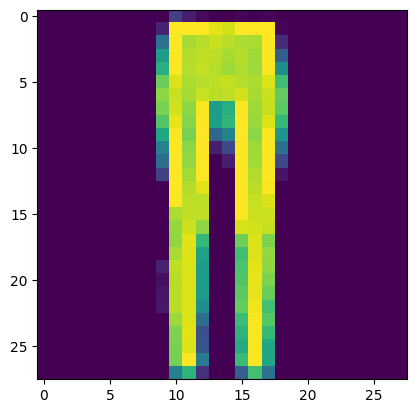

1


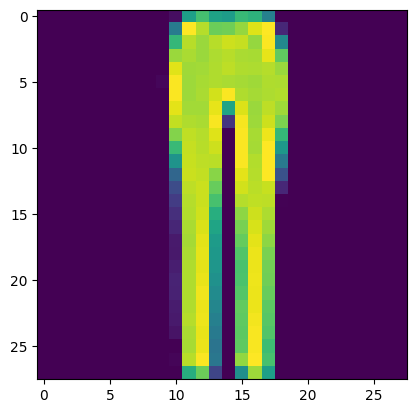

0


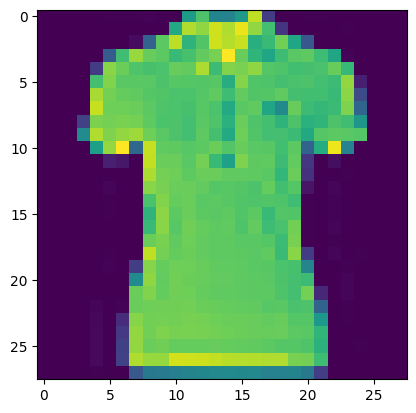

9


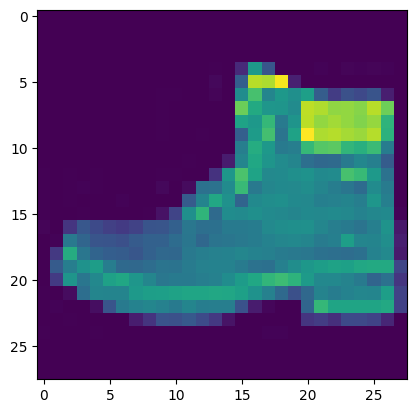

6


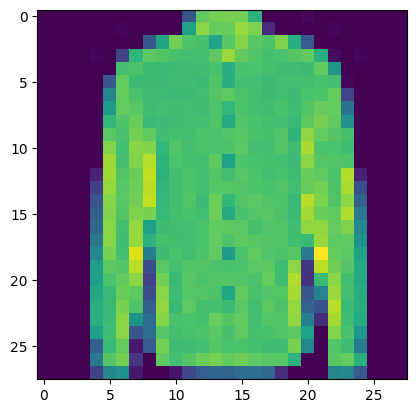

In [ ]:
import matplotlib.pyplot as plt
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show_imgs(img_loader,n):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:n]
    images = batch[0][0:n]
    for i in range(n):
        print(int(labels[i].detach()))

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()
show_imgs(train_dataloader,5)

### Show labels also

Ankle boot


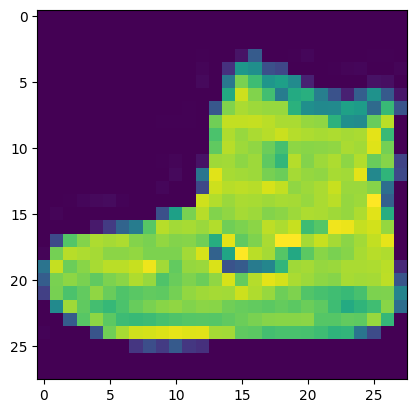

T-shirt/top


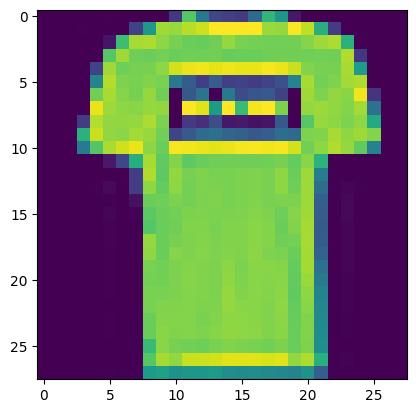

T-shirt/top


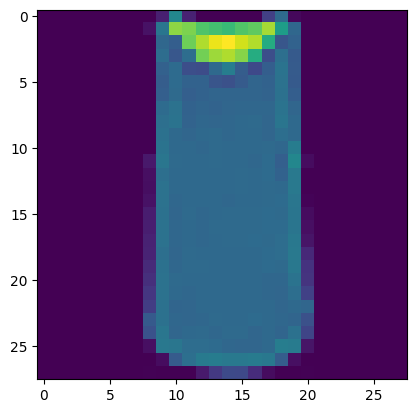

Dress


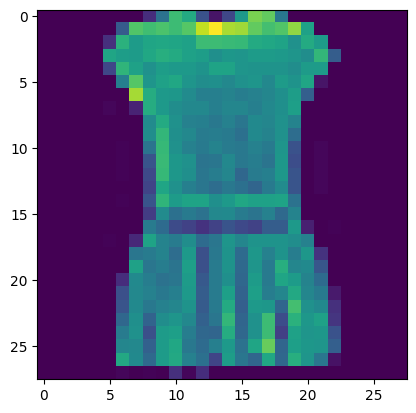

T-shirt/top


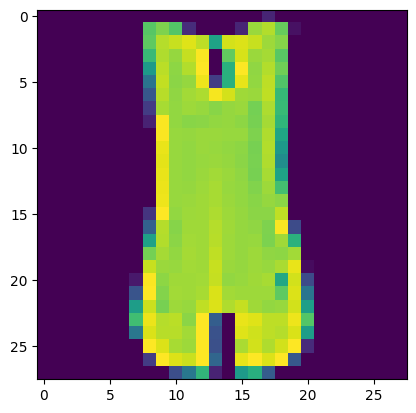

In [ ]:
import matplotlib.pyplot as plt
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show_imgs(img_loader,n):
    dataiter = iter(img_loader)

    batch = next(dataiter)
    labels = batch[1][0:n]
    images = batch[0][0:n]
    for i in range(n):
        label_idx = int(labels[i].detach())
        label_name = classes[label_idx]
        print(label_name)

        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()
show_imgs(train_dataloader,5)

## Training NNs

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define your neural network architecture
class NeuralNet(nn.Module): #inheretence concept
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.flatten = nn.Flatten()
        self.relu = nn.ReLU() #whether you will use this many times or not , Define it once
        self.fc1 = nn.Linear(784, 256) # Common approach 2^n
        self.fc2 = nn.Linear(256, 10) #why 10 ?


    def forward(self, x):
        x = self.flatten(x) # 28x28 --> 784
        x = self.fc1(x)   # 784 --> 256
        x = self.relu(x)
        x = self.fc2(x) # 256-->10 #Is dependent on the loss you will use
        #x = torch.softmax(x, dim=1)
        return x


# Instantiate the neural network
model = NeuralNet()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss() #Classification or regression?
optimizer = optim.SGD(model.parameters(), lr=0.01)



### Create a training Loop

In [ ]:
# Train the neural network
Epochs = 10
for epoch in range(Epochs): # 10  Epochs
    # ToDo: put the model in the training mode
    #✍️✍️✍️
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches


        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_dataloader)}") # Batch loss=Total losses/number of batches
    #ToDo: Print accuracies alongside losses. Hint: Use torch.max
    #✍️✍️✍️


Epoch 1: Loss = 0.7870230731615888
Epoch 2: Loss = 0.5187755208343331
Epoch 3: Loss = 0.46934768727529785
Epoch 4: Loss = 0.4415076993612338
Epoch 5: Loss = 0.4218966888942952
Epoch 6: Loss = 0.40662452397443083
Epoch 7: Loss = 0.39376352547900256
Epoch 8: Loss = 0.3834213175054298
Epoch 9: Loss = 0.37389667356001544
Epoch 10: Loss = 0.3654191573895117


### Test model accuracy using the test dataset Use Colab Generate

---



In [ ]:
# prompt: ### Test model accuracy using the test dataset

# ToDo: put the model in evaluation mode
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the model on the {total} test images: {accuracy:.2f}%")

Accuracy of the model on the 10000 test images: 84.95%


### Save your model


In [ ]:
torch.save(model, "./model1.pth")

### ✍️✍️ ToDo: Change the optimizer, the learning rate and the total number of training epochs

In [ ]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the neural network
Epochs = 15
for epoch in range(Epochs): # 10  Epochs
    # ToDo: put the model in the training mode
    #✍️✍️✍️
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader: #looping the batches


        # Zero the gradients
        optimizer.zero_grad()  #ensures that the gradients are cleared or reset to zero before the next forward-backward pass.

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward() #calculate the gradients
        #update our weights of each Batch
        optimizer.step()

        running_loss += loss.item() #accumulating losses over batches

    print(f"Epoch {epoch+1}: Loss = {running_loss/len(train_dataloader)}") # Batch loss=Total losses/number of batches
    #ToDo: Print accuracies alongside losses. Hint: Use torch.max
    #✍️✍️

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Epoch 1: Loss = 0.4194860549401373
Epoch 2: Loss = 0.35674039088586756
Epoch 3: Loss = 0.3270196629676229
Epoch 4: Loss = 0.3082023161624286
Epoch 5: Loss = 0.2887625504118293
Epoch 6: Loss = 0.27559493827635545
Epoch 7: Loss = 0.2641626710830721
Epoch 8: Loss = 0.25085991406157965
Epoch 9: Loss = 0.24129695120428415
Epoch 10: Loss = 0.23218388092924536
Epoch 11: Loss = 0.22252250997337705
Epoch 12: Loss = 0.21418028131429193
Epoch 13: Loss = 0.20902176224775532
Epoch 14: Loss = 0.20224413144261216
Epoch 15: Loss = 0.19282670367930108


We have changed the hyperparameters like LR, Number of epoch. We also used a different optimizer. This helped the training loss to decrease to 0.19. Test accuracy also increase to 89% and previously it was 85%.

### Test model accuracy again

In [ ]:
# prompt: ### Test model accuracy using the test dataset

# ToDo: put the model in evaluation mode
model.eval()

correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f"Accuracy of the model on the {total} test images: {accuracy:.2f}%")

Accuracy of the model on the 10000 test images: 88.91%


### Save the new model

In [ ]:
torch.save(model, "./model_new.pth")

### 📚📚 Creating DataLoader for Custom Dataset


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

# Define the custom dataset class
class RandomDataset(Dataset):
    def __init__(self, num_samples, image_shape):
        self.num_samples = num_samples
        self.image_shape = image_shape

    def __len__(self):
        return self.num_samples #returns the length of the dataset

    def __getitem__(self, idx):
        # Generate random image
        image = torch.randn(*self.image_shape) #generate random image

        # Generate random label
        label = torch.randint(0, 10, ()) #generate random label

        return image, label

# Define the dataset parameters
num_samples = 1000
image_shape = (1, 28, 28)  # (channels, height, width)

# Load your training data
train_dataset   = RandomDataset(num_samples, image_shape) # Generate random dataset Your training dataset

In [ ]:
# Create data loaders
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
print(len(train_loader))

16
